# Non-linear equations: introduction

This notebook is based on Chapter 1 of 

<a id='thebook'></a>

> Süli, Endre and Mayers, David F. _An introduction to numerical analysis_. Cambridge University Press, Cambridge, 2003. <https://doi.org/10.1017/CBO9780511801181> (ebook in [Helka](https://helka.helsinki.fi/permalink/358UOH_INST/1h3k2rg/alma9926836783506253)) 

In addition, some examples are taken from Chapters 1 and 2 of 

> Scott, L. Ridgway. _Numerical analysis_. Princeton University Press, Princeton, NJ, 2011.

The equation $x^2 = 2$ has two solutions $x = \pm \sqrt{2}$, but how do we compute an approximation to $\sqrt{2}$ as a floating-point number?

This problem has a long tradition, see the Babylonian clay tablet [YBC 7289](https://en.wikipedia.org/wiki/YBC_7289). 
Perhaps the first algorithm used for approximating $\sqrt{q}$, with $q > 0$, is the [Babylonian method](https://en.wikipedia.org/wiki/Methods_of_computing_square_roots#Babylonian_method):

1. Start with an initial guess $x_0$
2. Set 
$$
x_{n+1} = \frac 1 2 (x_n + \frac q {x_n})
$$
3. Repeat step 2 until the desired accuracy is achieved

In [ ]:
def babylonian_method(x, q):
    return 0.5*(x + q/x)

In [ ]:
import numpy as np
max_steps = 5
xs = np.zeros(max_steps)
x = 1.5
for n in range(max_steps):
    x = babylonian_method(x, 2)
    xs[n] = x
xs

In [ ]:
xtrue = np.sqrt(2)
errs = np.abs(xs - xtrue)

import pandas as pd
df = pd.DataFrame({
    'x': xs, 
    'error': errs, 
    })
df.index = range(1, max_steps+1)
df.index.name = 'n'
df.style.format({'error': '{:.1e}'})

# Fixed-point iteration

The Babylonian method is a fixed point iteration of the form

$$
x_{n+1} = f(x_n), \qquad n=0,1,\dots
$$

If the sequence $x_n$ converges to a point $\xi$ and $f$ is continuous, then $\xi$ is a fixed point of $f$, that is, $\xi = f(\xi)$. Indeed 

$$
\xi = \lim_{n \to \infty} x_{n+1} = \lim_{n \to \infty} f(x_n) = f(\xi).
$$

Note that while the Gaussian elimination terminates after a finite number of steps, a fixed point iteration may require infinite number of steps to converge.

In the case of the Babylonian method

$$
f(x) = \frac 1 2 (x + \frac q {x})
$$

and 
$$
\xi = f(\xi)
\quad\iff\quad
\xi = \frac q {\xi}
\quad\iff\quad
\xi^2 = q
\quad\iff\quad
\xi = \pm \sqrt{q}.
$$

One may wonder if the simpler choice $f(x) = \frac q {x}$ would work as well.
After all $\xi = f(\xi)$ is equivalent to $\xi = \pm \sqrt{q}$ also for this $f$.

In [ ]:
def non_method(x, q):
    return q / x

max_steps = 5
xs = np.zeros(max_steps)
x = 1.5 # initial guess 
for n in range(max_steps):
    x = non_method(x, 2)
    xs[n] = x
xs

Consider a closed interval $I = [a,b]$ with $a < b$.
A function $f : I \to \mathbb R$ is a _contraction_ if there is $0 < L < 1$ such that 

\begin{equation}\tag{1}
|f(x) - f(y)| \le L |x - y|, \qquad x,y \in I.
\end{equation}

The [mean value theorem](https://en.wikipedia.org/wiki/Mean_value_theorem) implies that (1) holds with $L = \max_{x \in I} |f'(x)|$ whenever $f$ is differentiable.

<div style='background:Lavender'>

## Theorem: Banach fixed-point

Suppose that $f : I \to I$ is a contraction. Then there is a unique fixed point $\xi \in I$ of $f$, and the sequence $x_{n+1} = f(x_{n})$ converges to $\xi$ for any initial guess $x_0 \in I$.
</div>


For a proof, see Theorem 1.3 of [the book](#thebook). 

<div style='background:Lavender'>

## Theorem: local convergence

Let $\xi$ be a fixed point of $f : \mathbb R \to \mathbb R$ and suppose that $f$ is continuously differentiable near $\xi$. If $|f'(\xi)| < 1$, then there is an open interval $I$ containing $\xi$ such that the sequence $x_{n+1} = f(x_{n})$ converges to $\xi$ for any initial guess $x_0 \in I$.
</div>

_Proof_. The continuity of $f'$ near $\xi$, together with $|f'(\xi)| < 1$, implies that there are $\epsilon > 0$ and $0 <\delta < 1$ such that 

$$
|f'(x)| \le \delta, \qquad x \in (\xi - \epsilon, \xi + \epsilon) =: I.
$$

The mean value theorem implies 

$$
|f(x) - f(y)| \le L |x - y|, \qquad x,y \in I,
$$

with $L = \delta$. In particular, 

$$
|f(x) - \xi| = |f(x) - f(\xi)| \le \delta |x - \xi| < \delta \epsilon < \epsilon, \qquad x \in I.
$$

Hence $f$ maps $I$ to itself and we can apply the Banach fixed-point theorem. $\blacksquare$

In the case of the Babylonian method

$$
f(x) = \frac 1 2 (x + \frac q {x}) 
\quad \text{and} \quad
f'(x) = \frac 1 2 (1 - \frac q {x^2}).
$$

Thus $f'(\xi) = 0$ at the fixed point $\xi = \sqrt{q}$,
and the method converges locally (that is, for an initial guess near $\xi$).

On the other hand, in the case of the "non-method"

$$
f(x) = \frac q {x},
\quad \text{and} \quad
f'(x) = - \frac q {x^2}.
$$

Thus $f'(\xi) = -1$ at $\xi = \sqrt{q}$,
and $f$ is **not** a contraction on any open interval containing $\xi$.


<div style='background:Lavender'>

## Definition: order of convergence

Suppose that a sequence $x_n$ converges to $\xi$ in $\mathbb R$.
If there are $p > 1$ and $\mu > 0$ such that 
\begin{align}
\tag{1}
\lim_{n \to \infty} \frac{|x_{n+1} - \xi|}{|x_{n} - \xi|^p} = \mu,
\end{align}

then $x_n$ is said to converge with order $p$.
If (1) holds with $p = 1$ and $0 < \mu < 1$,
then $x_n$ is said to converge linearly.
Finally, if (1) holds with $p = 1$ and $\mu = 1$,
then $x_n$ is said to converge sublinearly.
</div>

## Example: different orders of convergence

Let $\lambda \in (0,1)$. Then

* sequence $x_n = \lambda^n$ converges linearly to zero,
* sequence $x_n = \lambda^{2^n}$ converges quadratically (that is, with order 2) to zero,
* sequence $x_n = 1/n$ converges sublinearly to zero,
* sequence $x_n = \lambda^{n!}$ converges superpolynomially to zero in the sense that for all $p > 1$

$$
\frac{x_{n+1}}{x_n^p} \to 0.
$$

In [ ]:
from matplotlib import pyplot as plt

lam = 0.5
def f(n):
    return lam**n

N = 10
ns = np.arange(1, N+1)
plt.semilogy(ns, f(ns));


<div style='background:Lavender'>

## Theorem: local _linear_ convergence

Let $f$, $\xi$ and $I$ be as in the local convergence theorem. 
Suppose that $f'(\xi) \ne 0$. Then the sequence $x_{n+1} = f(x_{n})$ converges linearly to $\xi$ for any initial guess $x_0 \in I$.
</div>

_Proof_. The _local convergence_ theorem implies that $x_n \to \xi$. The mean value theorem implies that there is $\tilde x_n$ between $\xi$ and $x_n$ such that 

$$
f(x_n) - f(\xi) = f'(\tilde x_n)(x_n - \xi). 
$$

As $x_n \to \xi$, also $\tilde x_n \to \xi$. Recalling that $f'$ is continuous near $\xi$, we have

$$
\frac{|x_{n+1} - \xi|}{|x_{n} - \xi|}
= 
\frac{|f(x_n) - f(\xi)|}{|x_{n} - \xi|}
= 
|f'(\tilde x_n)| \to |f'(\xi)| =: \mu.
$$

To conclude, we observe that $0 < \mu < 1$.
$\blacksquare$

<div style='background:Lavender'>

## Theorem: local _higher-order_ convergence

Let $f$, $\xi$ and $I$ be as in the local convergence theorem. 
Suppose that $f$ has continuous derivatives up to order $p \ge 2$ near $\xi$,
and that $f'(\xi) = \dots = f^{(p - 1)}(\xi) = 0$
and $f^{(p)}(\xi) \ne 0$. Then the sequence $x_{n+1} = f(x_{n})$ converges with order $p$ to $\xi$ for any initial guess $x_0 \in I$.
</div>

_Proof_. The _local convergence_ theorem implies that $x_n \to \xi$. 
[Taylor's theorem](https://en.wikipedia.org/wiki/Taylor's_theorem#Explicit_formulas_for_the_remainder), with Lagrange form of the remainder, says that there is $\tilde x_n$ between $\xi$ and $x_n$ such that 

$$
f(x_n) - f(\xi) = \frac{f^{(p)}(\tilde x_n)}{p!}(x_n - \xi)^p. 
$$

As $x_n \to \xi$, also $\tilde x_n \to \xi$. Recalling that $f^{(p)}$ is continuous near $\xi$, we have

$$
\frac{|x_{n+1} - \xi|}{|x_{n} - \xi|^p}
= 
\frac{|f(x_n) - f(\xi)|}{|x_{n} - \xi|^p}
= 
\frac{|f^{(p)}(\tilde x_n)|}{p!} \to \frac{|f^{(p)}(\xi)|}{p!} \ne 0.
$$
$\blacksquare$

# Relaxation and Newton's method

The problem to solve $\phi(x) = 0$ can be rewritten as the problem to find a fixed point $x = f(x)$.

Indeed, these two problems are equivalent if
$f(x) = x - \phi(x)$.

<div style='background:Lavender'>

## Theorem: relaxation

Let $\phi : \mathbb R \to \mathbb R$ be continuously differentiable near a point $\xi \in \mathbb R$.
Suppose that $\phi(\xi) = 0$ and $\phi'(\xi) > 0$. Then there 
are an open interval $I$ containing $\xi$ and $\lambda > 0$ such that the relaxation iteration 

$$
x_{n+1} = x_n - \lambda \phi(x_n), \quad n=0,1\dots
$$

converges to $\xi$ for any initial guess $x_0 \in I$.
</div>

If instead $\phi(\xi) = 0$ and $\phi'(\xi) < 0$, then we can apply the theorem to $-\phi$.

_Proof_. The function $f(x) = x - \lambda \phi(x)$ satisfies 

$$
-1 < f'(\xi) = 1 - \lambda \phi'(\xi) < 1
$$

for small $\lambda > 0$, and we can apply the _local convergence_ theorem.
$\blacksquare$

Note that the choice $\lambda = 1/\phi'(\xi)$ leads to $f'(\xi) = 0$
and gives a method with at least quadratic convergence. 
Of course, we typically don't know $\xi$ (we are solving for it), and hence can not make this optimal choice in practice. 

Let's apply relaxation to the "non-method" $f(x) = q / x$. In this case 

$$
\phi(x) = x - \frac q x, \quad \phi'(x) = 1 + \frac q {x^2}.
$$

In particular, $\phi'(\xi) = 2$ at $\xi = \sqrt{q}$. 
Taking $\lambda = 1/\phi'(\xi) = 1/2$ gives the Babylonian method

$$
x_{n+1} = x_n - \frac 1 2 \phi(x_n) = \frac 1 2 (x_n + \frac q {x_n}).
$$


Newton's method can be viewed as a generalization of the relaxation iteration where we let $\lambda$ to be non-constant, and take $\lambda = 1/\phi'(x_n)$:

$$
x_{n+1} = x_n - \frac {\phi(x_n)}{\phi'(x_n)}, \quad n=0,1\dots
$$

Put differently, we take $\phi'(x_n)$ as a proxy of $\phi'(\xi)$. Another, way to arrive to Newton's method is to replace $\phi(x)$ in the equation $\phi(x) = 0$
by its first order Taylor polynomial at $x = x_n$, that is,

$$
0 = \phi(x) \approx \phi(x_n) + \phi'(x_n) (x - x_n).
$$

Then solving for $x$ gives $x = x_{n+1}$ with $x_{n+1}$ as above.

Let us apply Newton's method to the equation $x^2 = q$ and take $\phi(x) = x^2 - q$.
Then

$$
x_{n+1} = x_n - \frac {x_n^2 - q} {2 x_n} = \frac 1 2 (x_n + \frac q {x_n}),
$$

the Babylonian method once again.

<div style='background:Lavender'>

## Theorem: convergence of Newton's method

Suppose that $\phi : \mathbb R \to \mathbb R$ has continuous derivatives up to order 3 near a point $\xi \in \mathbb R$, and that $\phi(\xi) = 0$ and $\phi'(\xi) \ne 0$. Then there 
is an open interval $I$ containing $\xi$ such that Newton's method 

$$
x_{n+1} = x_n - \frac {\phi(x_n)}{\phi'(x_n)}, \quad n=0,1\dots
$$

converges at least quadratically to $\xi$ for any initial guess $x_0 \in I$.
</div>

_Proof_. The function

$$
f(x) =  x - \frac {\phi(x)}{\phi'(x)}
$$

satisfies $f'(\xi) = 0$, and we can apply the _local higher-order convergence_ theorem.
$\blacksquare$

A slightly sharper proof shows that the assumptions can be weakened to $\phi$ having continuous derivatives up to order 2 near $\xi$, see Theorem 1.8 of the [the book](#thebook).

## Example: Kepler's equation

In orbital mechanics, [Kepler's equation](https://en.wikipedia.org/wiki/Kepler%27s_equation) relates various geometric properties of the orbit of a body subject to a central force. It reads

$$
M = E - e \sin E
$$

where $M$ is the mean anomaly, $E$ is the eccentric anomaly, and $e$ is the eccentricity. 

The first published use by Newton of his eponymous method in an iterative form, and applied to a nonpolynomial equation, is in the second and third editions of
his _Philosophiae Naturalis Principia Mathematica_, where it is applied to Kepler's equation. For more details, see Section 6 of

>Ypma, Tjalling J. _Historical development of the Newton-Raphson method_. SIAM Rev. 37 (1995), no. 4, 531–551. <https://doi.org/10.1137/1037125>

Let us consider the following calculation that is reproduced from p. 148 of

> Duffett-Smith, Peter and Zwart, Jonathan. _Practical Astronomy with your Calculator or Spreadsheet_. Cambridge University Press, Cambridge, UK, 2011. (ebook in [Helka](https://helka.helsinki.fi/permalink/358UOH_INST/1h3k2rg/alma9932214283506253))

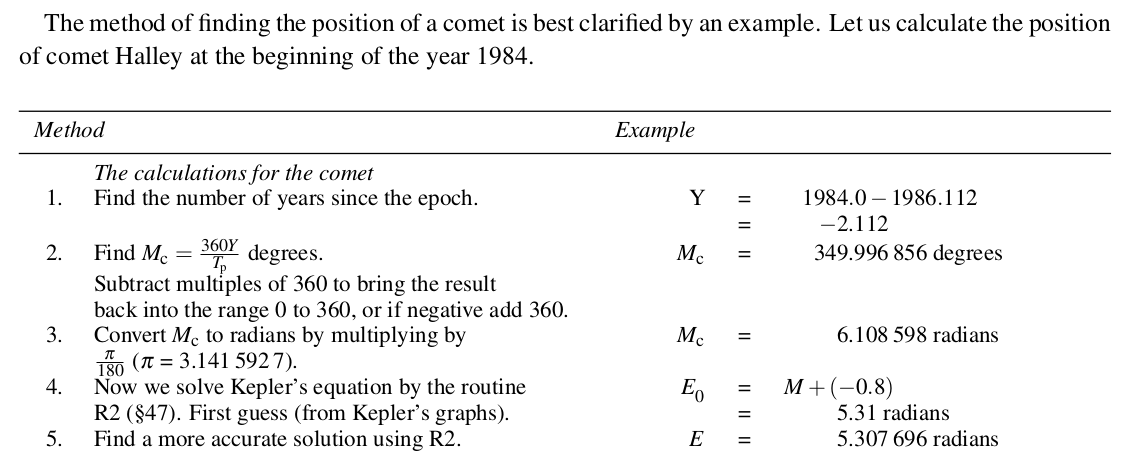

In [ ]:
# Parameters from the book by Duffett-Smith and Zwart
M = 6.108598
E0 = 5.31
e = 0.9673 # eccentricity of the orbit of Halley is given on p. 145

# Solve Kepler's equation  E - e sin(E) - M = 0 

def f(E):
    return E - e*np.sin(E) - M
def fprime(E):
    return 1 - e*np.cos(E)

def newton_demo(f, x0, fprime, max_steps = 5):
    '''Newton's method with a fixed number of steps'''
    x = x0
    for n in range(max_steps):
        x = x - f(x)/fprime(x)
    return x

E = newton_demo(f, E0, fprime)
print(f'newton_demo: {E = }')
    
import scipy.optimize as opt
E = opt.newton(f, E0, fprime)
print(f'opt.newton: {E  = }')


## Example: global behavior of Newton's method

Consider

$$
f(x) = x \exp(- x^2).
$$

The only solution to $f(x) = 0$ is $x = 0$, and $f'(0) = 1$. Hence Newton's method converges starting from an initial guess $x_0$ close enough to the origin. But it does not converge if the initial guess is not good enough. 

In [ ]:
def f(x):
    return x * np.exp(-x**2)

xs = np.linspace(-4, 4)
plt.plot(xs, f(xs)); 

x0 = 1
plt.plot([x0, x0], [-0.5, 0.5], 'r');


In [ ]:
def fprime(x):
    return (1 - 2*x**2) * np.exp(-x**2)

x = newton_demo(f, x0, fprime, max_steps=100)
print(f'{x0 = }, {x = }')

# On the optimization sub-package of SciPy

We have already seen [newton](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html), the implementation of Newton's method in SciPy. Calling `newton` without giving the derivative makes SciPy to use the secant method, described in Section 1.5 of [the book](#thebook). The bisection method is given by [bisect](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.bisect.html) and it is described in Section 1.6 of [the book](#thebook).

Most of the methods in the optimization sub-package are outside the scope of this course. Some of them are described in the optimization course at UH. For more information on the sub-package see the [tutorial](https://docs.scipy.org/doc/scipy/tutorial/optimize.html).

In [ ]:
# Compare Newton, secant and bisection
def f(x):
    return np.exp(x) - x - 2
def fprime(x):
    return np.exp(x) - 1
x0, x1 = 1, 3

x, rres = opt.newton(f, x0, fprime, full_output=True) 
print(f"     Newton's method converged to {x} in {rres.iterations} steps")
x, rres = opt.newton(f, x0, x1=x1, full_output=True) 
print(f'   The secant method converged to {x} in {rres.iterations} steps')
x, rres = opt.bisect(f, x0, x1, full_output=True) 
print(f"The bisection method converged to {x} in {rres.iterations} steps")